In [83]:
# 필요한 Module import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

# 한글 font 깨짐 방지용 code.
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [84]:
# 필요한 csv file read.
park_df = pd.read_csv("C:/Users/USER/Desktop/Real_park_final.csv")
train_df = pd.read_csv("C:/Users/USER/Desktop/train_modified.csv")

In [85]:
# Real_park_final.csv file info check.
park_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         1357 non-null   object 
 1   gu                           1357 non-null   object 
 2   dong                         1357 non-null   object 
 3   park_name                    1357 non-null   object 
 4   park_type                    1357 non-null   object 
 5   park_area                    1357 non-null   float64
 6   park_exercise_facility       1357 non-null   int64  
 7   park_entertainment_facility  1357 non-null   int64  
 8   park_benefit_facility        1357 non-null   int64  
 9   park_cultural_facility       1357 non-null   int64  
 10  park_facility_other          1357 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 116.7+ KB


In [86]:
# train_modified.csv file info check.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 14 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   gu                      1216070 non-null  object 
 4   dong                    1216553 non-null  object 
 5   jibun                   1216553 non-null  object 
 6   apt                     1216553 non-null  object 
 7   addr_kr                 1216553 non-null  object 
 8   exclusive_use_area      1216553 non-null  float64
 9   year_of_completion      1216553 non-null  int64  
 10  transaction_year_month  1216553 non-null  int64  
 11  transaction_date        1216553 non-null  object 
 12  floor                   1216553 non-null  int64  
 13  transaction_real_price  1216553 non-null  int64  
dtypes:

In [87]:
# 서울특별시의 '구' 개수 확인.
# '구 개수 == 각 구에 존재하는 공원 개수'
seoul_gu_count = park_df[park_df['city'] == '서울특별시']['gu'].value_counts()

# 개수 확인
seoul_gu_count

gu
송파구     147
강남구     132
강서구     109
서초구     107
은평구      79
서대문구     50
구로구      47
동작구      46
동대문구     41
용산구      32
성동구      23
강동구      23
관악구      21
중구       14
중랑구      11
광진구      11
금천구      10
강북구       9
영등포구      8
종로구       5
도봉구       2
노원구       2
양천구       1
Name: count, dtype: int64

In [88]:
# 부산광역시에 존재하는 구 개수 확인
# '구 개수 == 구에 존재하는 공원 개수'
busan_gu_count = park_df[park_df['city'] == '부산광역시']['gu'].value_counts()

# 개수 확인
busan_gu_count

gu
북구      72
해운대구    46
동래구     45
강서구     39
남구      38
사하구     32
금정구     31
부산진구    30
사상구     30
연제구     20
영도구     14
수영구     14
서구      11
중구       3
동구       2
Name: count, dtype: int64

In [89]:
# park csv 파일에서 서울시의 각 구별 'park_area'(공원 면적)의 값의 평균 구하기.
# 자연수로 반올림 처리.
seoul_park_area_mean = park_df[park_df['city'] == '서울특별시'].groupby('gu')['park_area'].mean().round()

# 값 확인
seoul_park_area_mean

gu
강남구       16077.0
강동구       66580.0
강북구      168355.0
강서구       25493.0
관악구        1075.0
광진구         920.0
구로구       57564.0
금천구        8857.0
노원구     6013531.0
도봉구      337808.0
동대문구      21577.0
동작구       46352.0
서대문구      27042.0
서초구       15453.0
성동구        5516.0
송파구       25020.0
양천구        3353.0
영등포구       5290.0
용산구       13242.0
은평구       75667.0
종로구       42959.0
중구        13193.0
중랑구      266735.0
Name: park_area, dtype: float64

In [90]:
# 부산광역시의 각 구별 'park_area'(공원 면적)의 값의 평균 구하기.
# 자연수로 반올림 처리.
busan_park_area_mean = park_df[park_df['city'] == '부산광역시'].groupby('gu')['park_area'].mean().round()

# 값 확인
busan_park_area_mean

gu
강서구       13894.0
금정구       81116.0
남구        63588.0
동구        16066.0
동래구       92669.0
부산진구     202645.0
북구        12800.0
사상구       22759.0
사하구       29903.0
서구       353838.0
수영구        8380.0
연제구        2844.0
영도구       60564.0
중구      1749965.0
해운대구       8382.0
Name: park_area, dtype: float64

In [91]:
# transaction_real_price의 평균값 구해서 반올림.
seoul_transaction_price_mean = train_df[train_df['city'] == '서울특별시'].groupby('gu')['transaction_real_price'].mean().round()
busan_transaction_price_mean = train_df[train_df['city'] == '부산광역시'].groupby('gu')['transaction_real_price'].mean().round()


In [92]:
# 서울특별시의 구 별 실거래값 평균 확인.
seoul_transaction_price_mean

gu
강남구     95168.0
강동구     46180.0
강북구     32847.0
강서구     36881.0
관악구     36150.0
광진구     56678.0
구로구     33590.0
금천구     28286.0
노원구     29213.0
도봉구     28289.0
동대문구    37643.0
동작구     50892.0
마포구     51573.0
서대문구    39218.0
서초구     93760.0
성동구     52947.0
성북구     38026.0
송파구     69447.0
양천구     51455.0
영등포구    46140.0
용산구     84635.0
은평구     38371.0
종로구     48969.0
중구      53622.0
중랑구     30611.0
Name: transaction_real_price, dtype: float64

In [93]:
# 부산광역시의 구 별 실거래값 평균 확인하기.
busan_transaction_price_mean

gu
강서구     31240.0
금정구     22736.0
기장군     19839.0
남구      23470.0
동구      18718.0
동래구     23280.0
부산진구    18754.0
북구      17981.0
사상구     14934.0
사하구     15142.0
서구      19592.0
수영구     26188.0
연제구     24178.0
영도구     14160.0
중구      13321.0
해운대구    26907.0
Name: transaction_real_price, dtype: float64

In [94]:
# 서울 및 부산의 공원 면적의 평균값과 서울 및 부산의 실거래값의 평균값의 길이가 서로 달라 에러 발생.
# ValueError를 해결하기 위한 코드.
seoul_merged = pd.merge(seoul_park_area_mean, seoul_transaction_price_mean, on='gu', how='inner')
busan_merged = pd.merge(busan_park_area_mean, busan_transaction_price_mean, on='gu', how='inner')

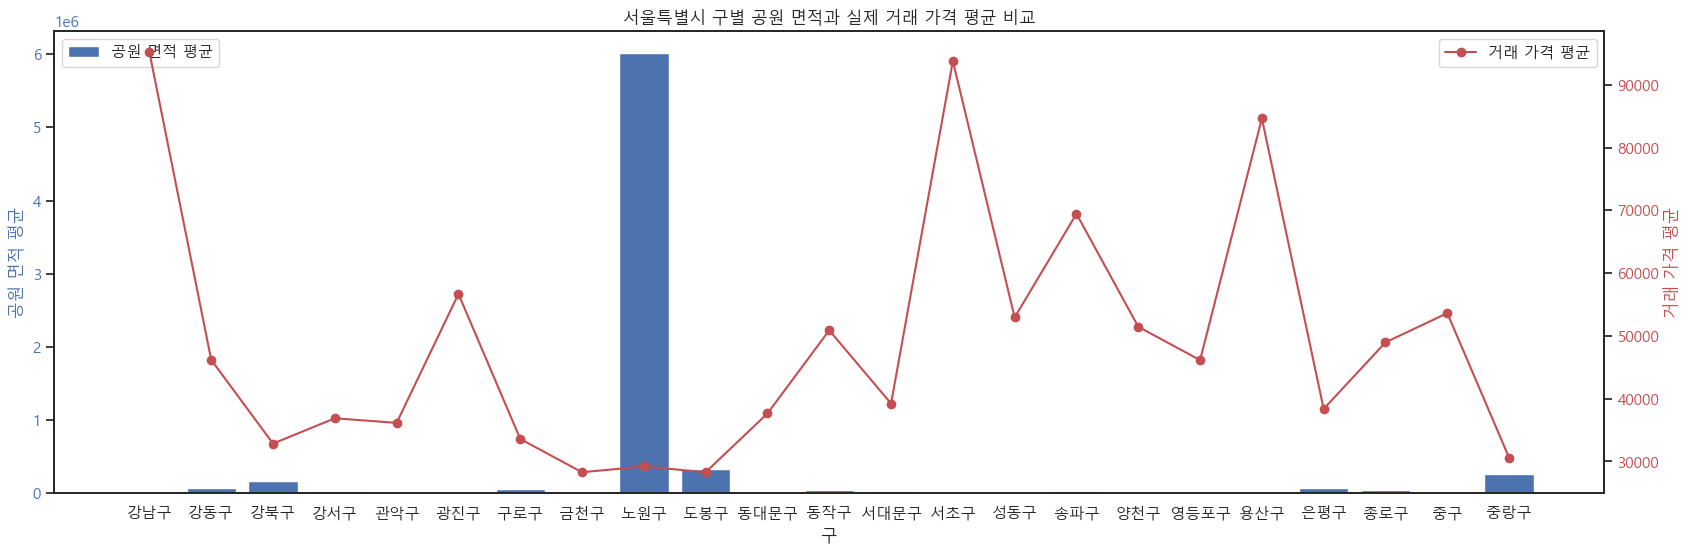

In [95]:
# 서울의 구별 공원 면적 평균값 및 구별 아파트 실거래값 간 상관관계를 확인하기 위한 그래프
fig, ax1 = plt.subplots(figsize=(20, 6))

# X축: 구 이름
gu_names = seoul_merged.index

# 첫 번째 Y축: 공원 면적 평균 (bar plot)
ax1.bar(gu_names, seoul_merged['park_area'], color='b', label='공원 면적 평균')
ax1.set_xlabel('구')
ax1.set_ylabel('공원 면적 평균', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 두 번째 Y축: 거래 가격 평균 (line plot)
ax2 = ax1.twinx()
ax2.plot(gu_names, seoul_merged['transaction_real_price'], color='r', marker='o', label='거래 가격 평균')
ax2.set_ylabel('거래 가격 평균', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 그래프 제목
plt.title('서울특별시 구별 공원 면적과 실제 거래 가격 평균 비교')

# 레전드 설정
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 표시
plt.show()

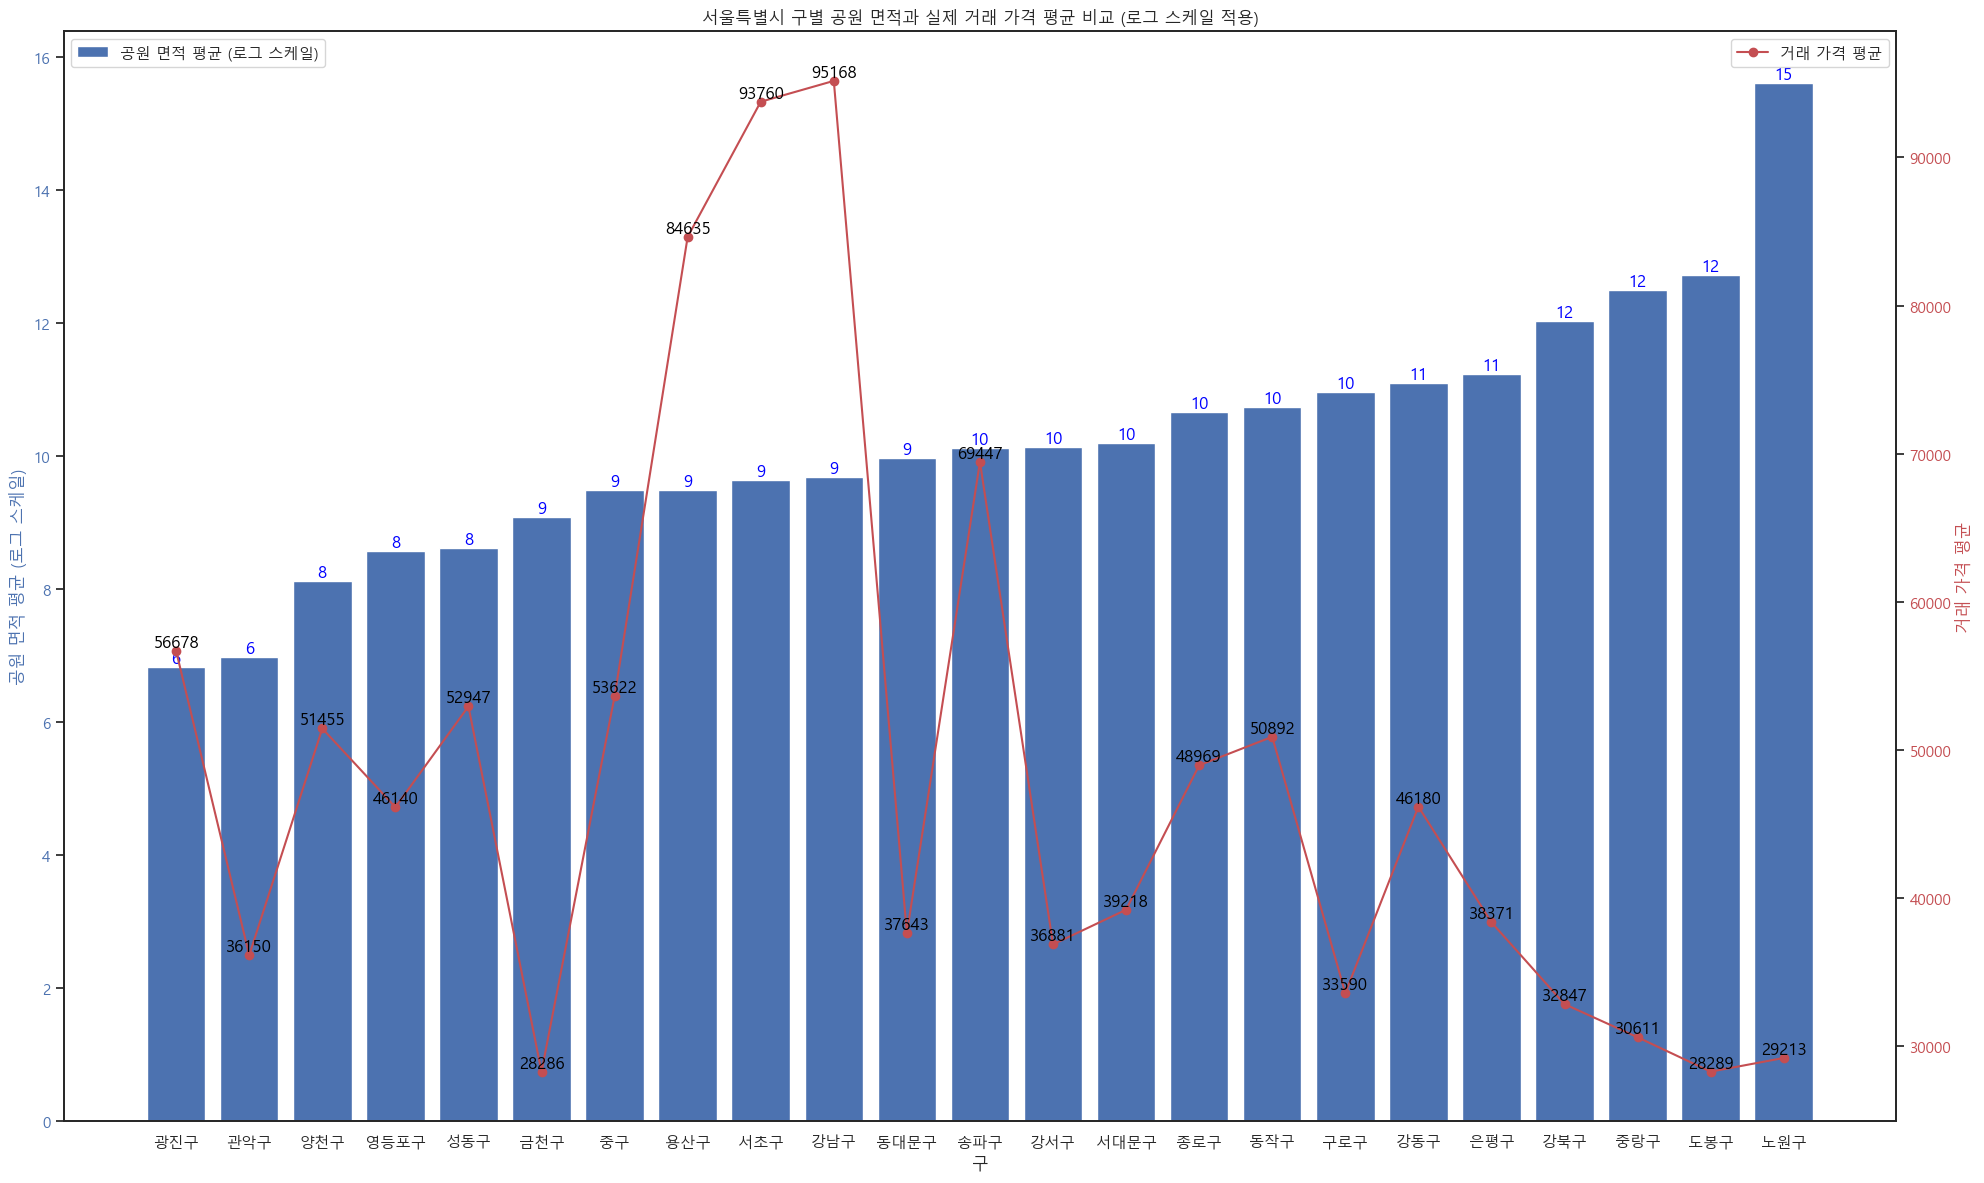

In [109]:
# 'seoul_merged' 데이터를 park_area 값을 기준으로 오름차순으로 정렬
seoul_merged_sorted = seoul_merged.sort_values('park_area')

# 시각화 - 로그 스케일 적용
fig, ax1 = plt.subplots(figsize=(20, 12))

# X축: 구 이름 (정렬된 상태)
gu_names_sorted = seoul_merged_sorted.index

# 첫 번째 Y축: 공원 면적 평균 (bar plot) - 로그 스케일 적용
bars = ax1.bar(gu_names_sorted, np.log1p(seoul_merged_sorted['park_area']), color='b', label='공원 면적 평균 (로그 스케일)')
ax1.set_xlabel('구')
ax1.set_ylabel('공원 면적 평균 (로그 스케일)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 막대 위에 수치 표시
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', color='blue')

# 두 번째 Y축: 거래 가격 평균 (선 그래프)
ax2 = ax1.twinx()
line, = ax2.plot(gu_names_sorted, seoul_merged_sorted['transaction_real_price'], color='r', marker='o', label='거래 가격 평균')
ax2.set_ylabel('거래 가격 평균', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 선 위에 수치 표시
for i, price in enumerate(seoul_merged_sorted['transaction_real_price']):
    ax2.text(i, price, f'{int(price)}', ha='center', va='bottom', color='black')

# 그래프 제목
plt.title('서울특별시 구별 공원 면적과 실제 거래 가격 평균 비교 (로그 스케일 적용)')

# 레전드 설정
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 표시
plt.xticks(rotation=90)  # 구 이름이 잘 보이도록 X축 라벨 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()


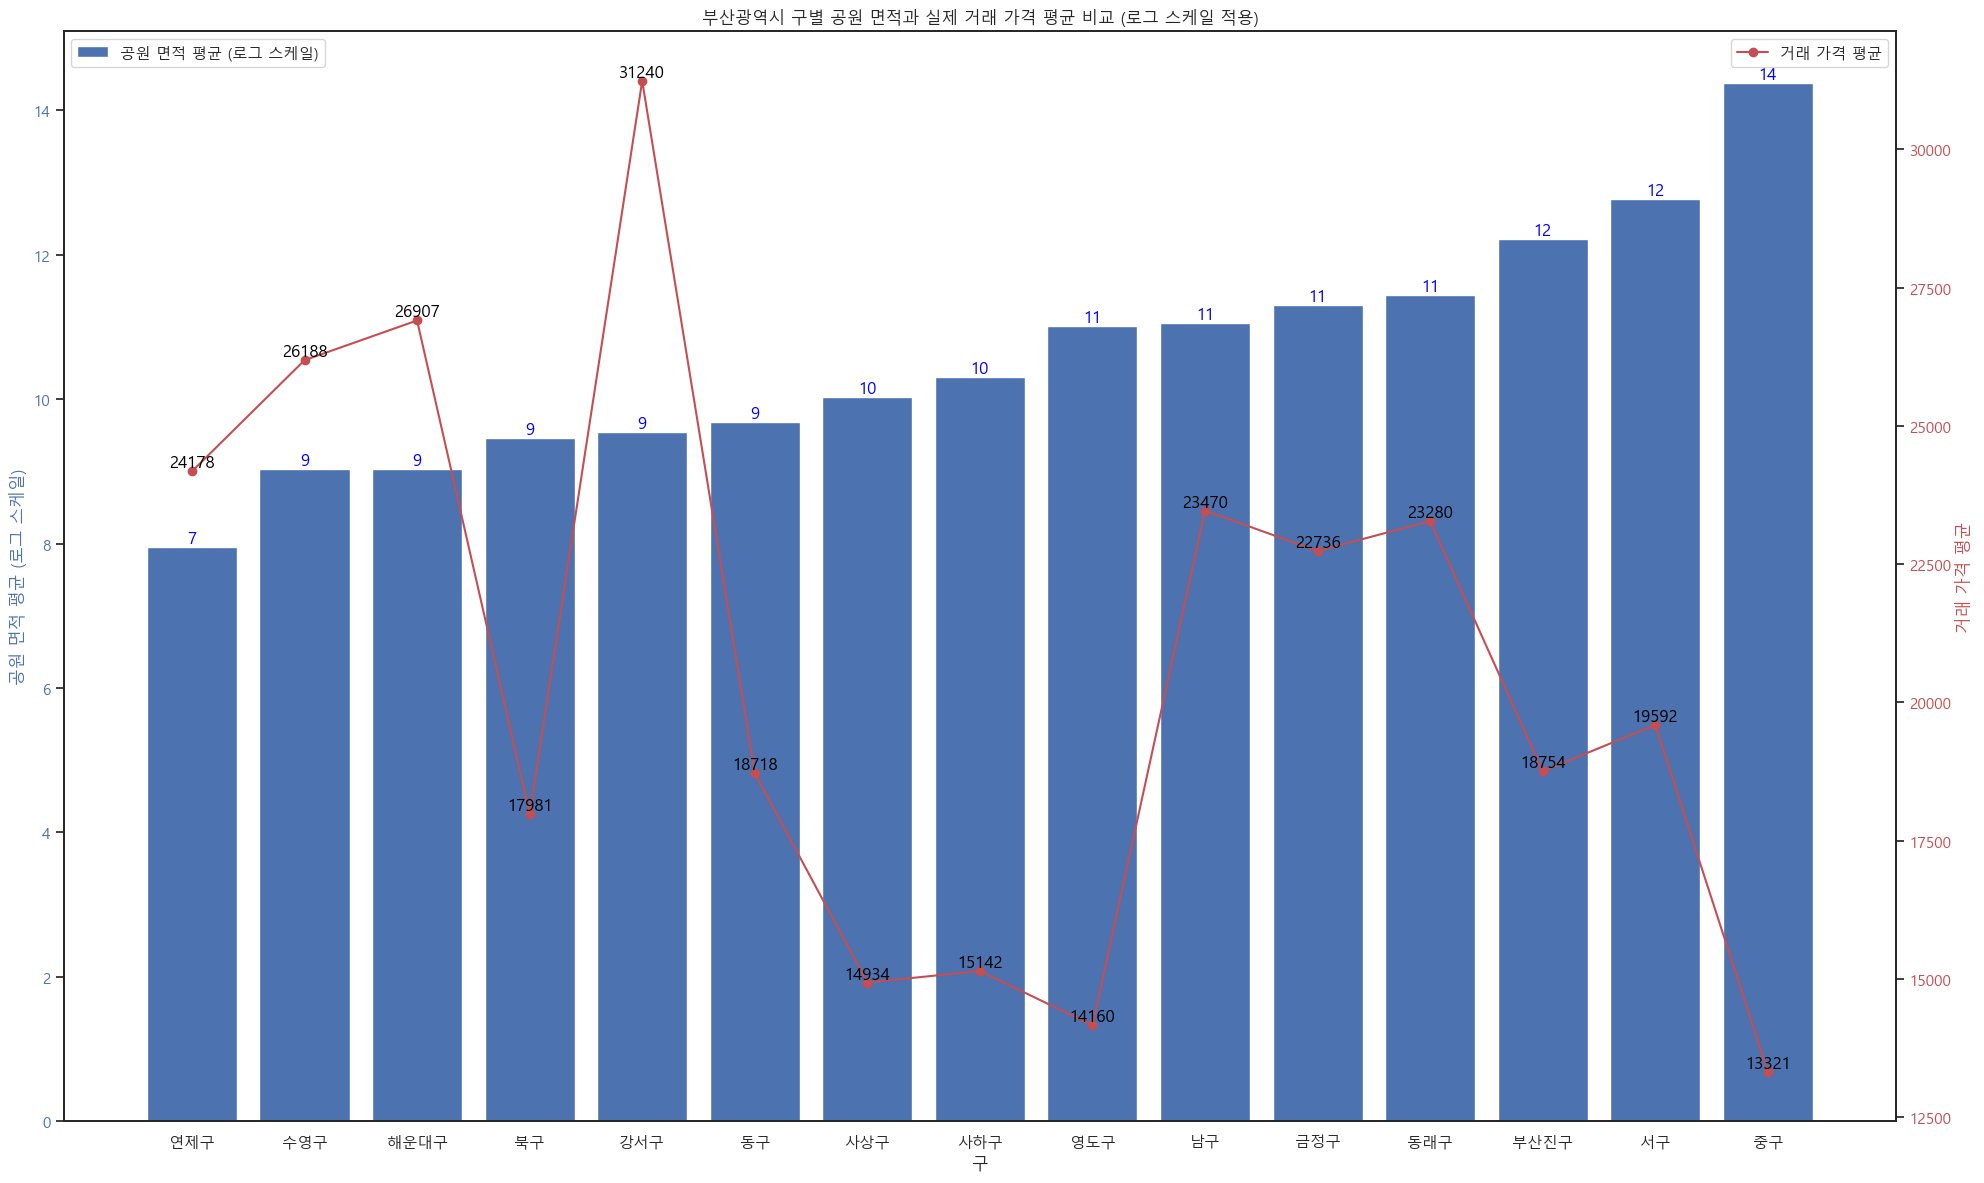

In [107]:
# 'busan_merged' 데이터를 park_area 값을 기준으로 오름차순으로 정렬
busan_merged_sorted = busan_merged.sort_values('park_area')

# 시각화 - 로그 스케일 적용
fig, ax1 = plt.subplots(figsize=(20, 12))

# X축: 구 이름 (정렬된 상태)
gu_names_sorted = busan_merged_sorted.index

# 첫 번째 Y축: 공원 면적 평균 (bar plot) - 로그 스케일 적용
bars = ax1.bar(gu_names_sorted, np.log1p(busan_merged_sorted['park_area']), color='b', label='공원 면적 평균 (로그 스케일)')
ax1.set_xlabel('구')
ax1.set_ylabel('공원 면적 평균 (로그 스케일)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 막대 위에 수치 표시
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', color='blue')

# 두 번째 Y축: 거래 가격 평균 (선 그래프)
ax2 = ax1.twinx()
line, = ax2.plot(gu_names_sorted, busan_merged_sorted['transaction_real_price'], color='r', marker='o', label='거래 가격 평균')
ax2.set_ylabel('거래 가격 평균', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 선 위에 수치 표시
for i, price in enumerate(busan_merged_sorted['transaction_real_price']):
    ax2.text(i, price, f'{int(price)}', ha='center', va='bottom', color='black')

# 그래프 제목
plt.title('부산광역시 구별 공원 면적과 실제 거래 가격 평균 비교 (로그 스케일 적용)')

# 레전드 설정
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 표시
plt.xticks(rotation=90)  # 구 이름이 잘 보이도록 X축 라벨 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()


In [98]:
# 전체 공원 중 5개의 facility 열들 중 하나라도 0이 아닌 값이 들어가있는 행의 개수 파악하기.
# 먼저, 공통으로 확인해야 하는 열들을 하나의 변수로 정의하기.
facilities = ['park_exercise_facility', 'park_entertainment_facility', 'park_benefit_facility', 'park_cultural_facility', 'park_facility_other']

# 서울시에서 위의 5개의 columns들 중 하나라도 0이 아닌 값이 있는 행을 찾기.
# gu 별로 분류하기.
seoul_park_data = park_df[park_df['city'] == '서울특별시']
seoul_non_zero_counts = seoul_park_data.groupby('gu').apply(lambda x: (x[facilities] != 0).any(axis=1).sum())

# 부산시에서 위의 5개의 columns들 중 하나라도 0이 아닌 값이 있는 행을 찾기.
busan_park_data = park_df[park_df['city'] == '부산광역시']
busan_non_zero_counts = busan_park_data.groupby('gu').apply(lambda x: (x[facilities] != 0).any(axis=1).sum())

In [99]:
# 서울시의 facility 값이 0이 아닌 행 개수 확인.
seoul_non_zero_counts

gu
강남구      0
강동구     22
강북구      9
강서구      0
관악구     19
광진구      8
구로구     40
금천구     10
노원구      2
도봉구      2
동대문구    35
동작구      0
서대문구    45
서초구      0
성동구     21
송파구      0
양천구      1
영등포구     8
용산구     26
은평구     52
종로구      3
중구      10
중랑구      0
dtype: int64

In [100]:
# 부산시의 facility 값이 0이 아닌 행 개수 확인.
busan_non_zero_counts

gu
강서구     38
금정구     24
남구       0
동구       2
동래구     17
부산진구    19
북구      63
사상구     29
사하구      0
서구      11
수영구      0
연제구     20
영도구     12
중구       1
해운대구     0
dtype: int64

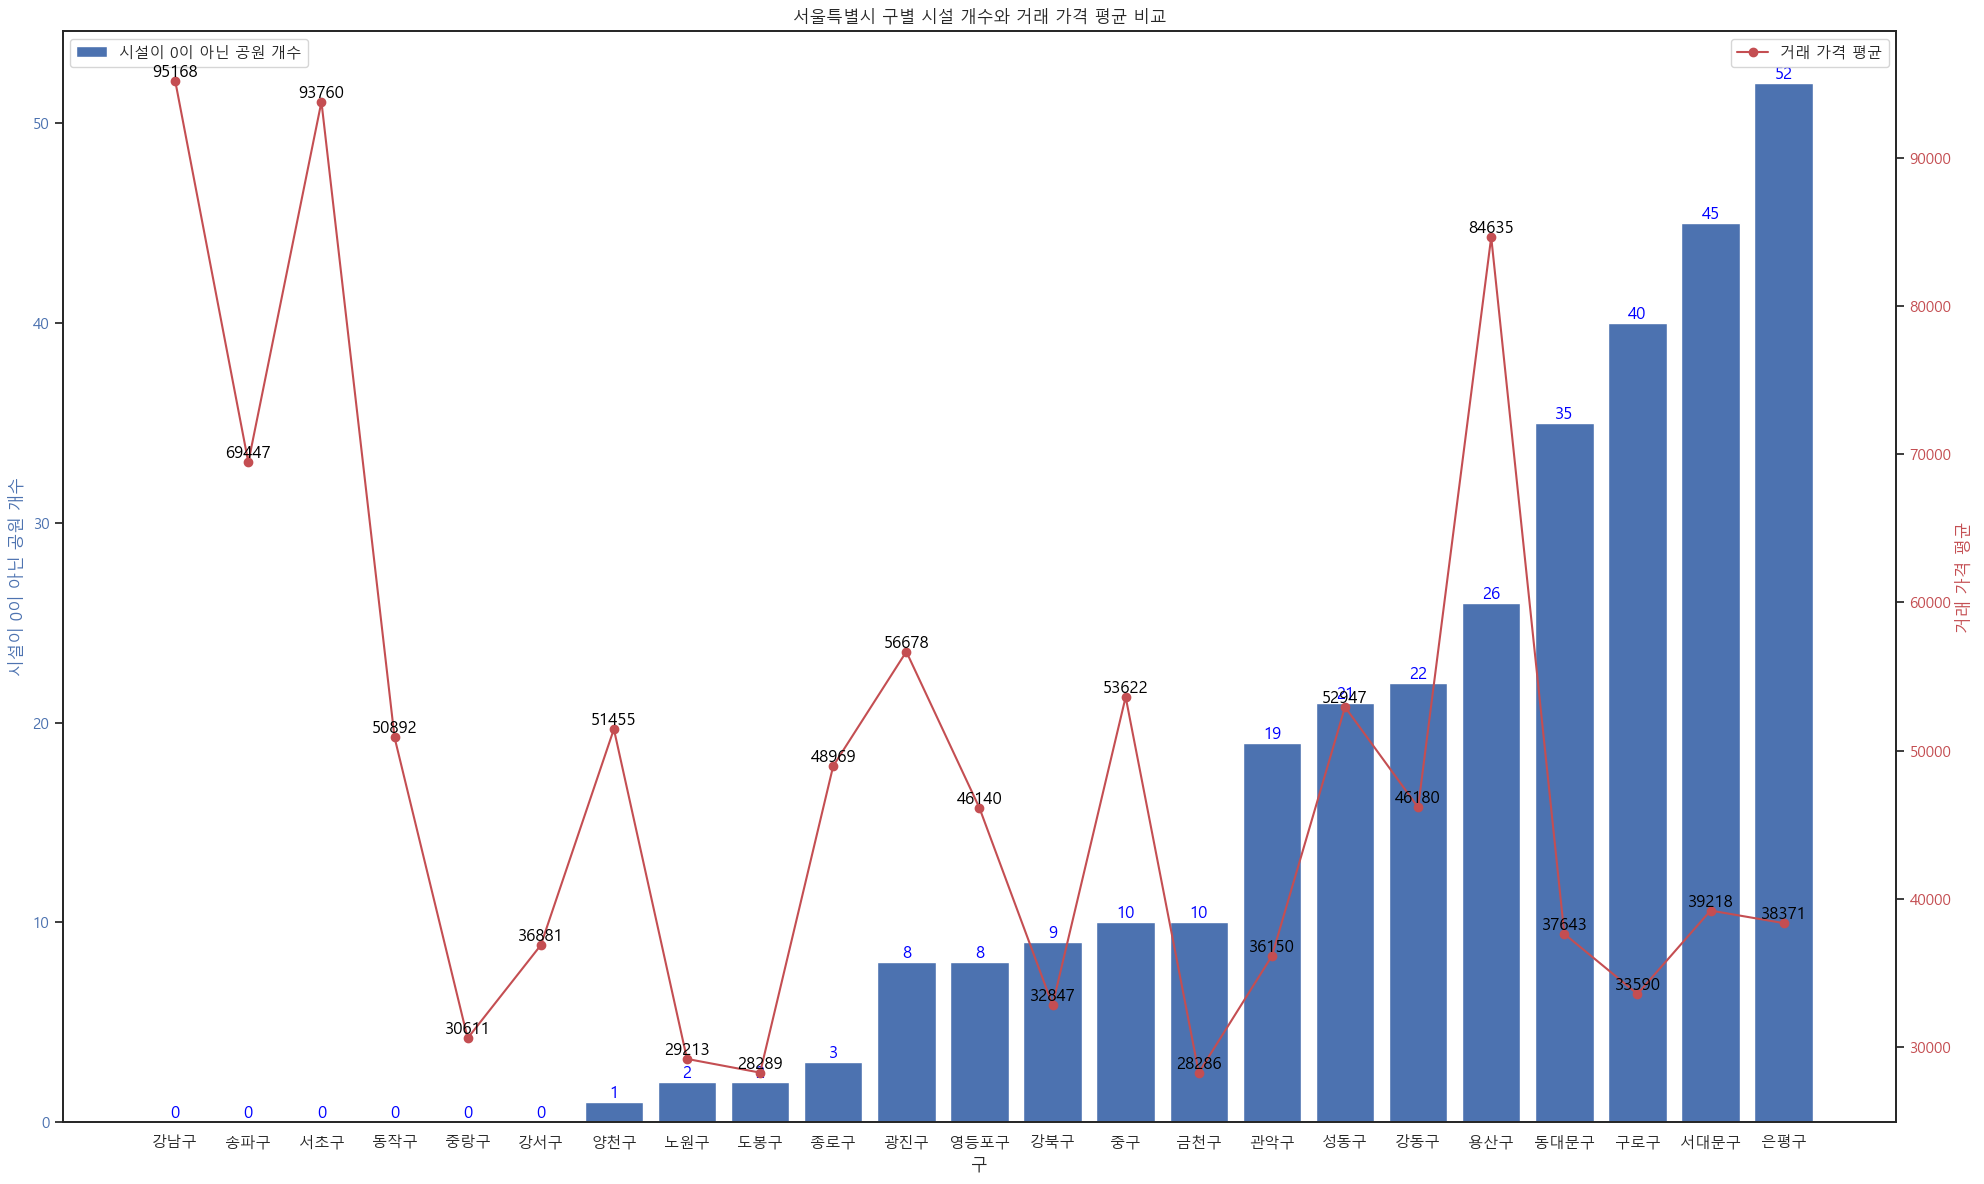

In [106]:
# 서울특별시의 facility가 1개 이상인 공원의 개수와 아파트 실거래값 상관관계를 확인할 수 있는 그래프 만들기. (서울)
# 1. 시각화 - 서울특별시 'gu 이름', 'seoul_non_zero_counts', 'transaction_real_price' 표시
# 세로막대그래프 값이 작은 순서대로 정렬
seoul_non_zero_counts_sorted = seoul_non_zero_counts.sort_values()

# 거래 가격 평균도 같은 순서로 정렬
seoul_transaction_price_sorted = seoul_merged.loc[seoul_non_zero_counts_sorted.index, 'transaction_real_price']

# 시각화 시작
fig, ax1 = plt.subplots(figsize=(20, 12))

# X축: 구 이름 (정렬된 상태)
gu_names_sorted = seoul_non_zero_counts_sorted.index

# 첫 번째 Y축: 시설이 0이 아닌 공원 개수 (막대 그래프)
bars = ax1.bar(gu_names_sorted, seoul_non_zero_counts_sorted, color='b', label='시설이 0이 아닌 공원 개수')
ax1.set_xlabel('구')
ax1.set_ylabel('시설이 0이 아닌 공원 개수', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 막대 위에 수치 표시
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', color='blue')

# 두 번째 Y축: 거래 가격 평균 (선 그래프)
ax2 = ax1.twinx()
ax2.plot(gu_names_sorted, seoul_transaction_price_sorted, color='r', marker='o', label='거래 가격 평균')
ax2.set_ylabel('거래 가격 평균', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 선 위에 수치 표시
for i, price in enumerate(seoul_transaction_price_sorted):
    ax2.text(i, price, f'{int(price)}', ha='center', va='bottom', color='black')

# 그래프 제목
plt.title('서울특별시 구별 시설 개수와 거래 가격 평균 비교')

# 레전드 설정
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 표시
plt.xticks(rotation=90)  # 구 이름이 잘 보이도록 X축 라벨 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()

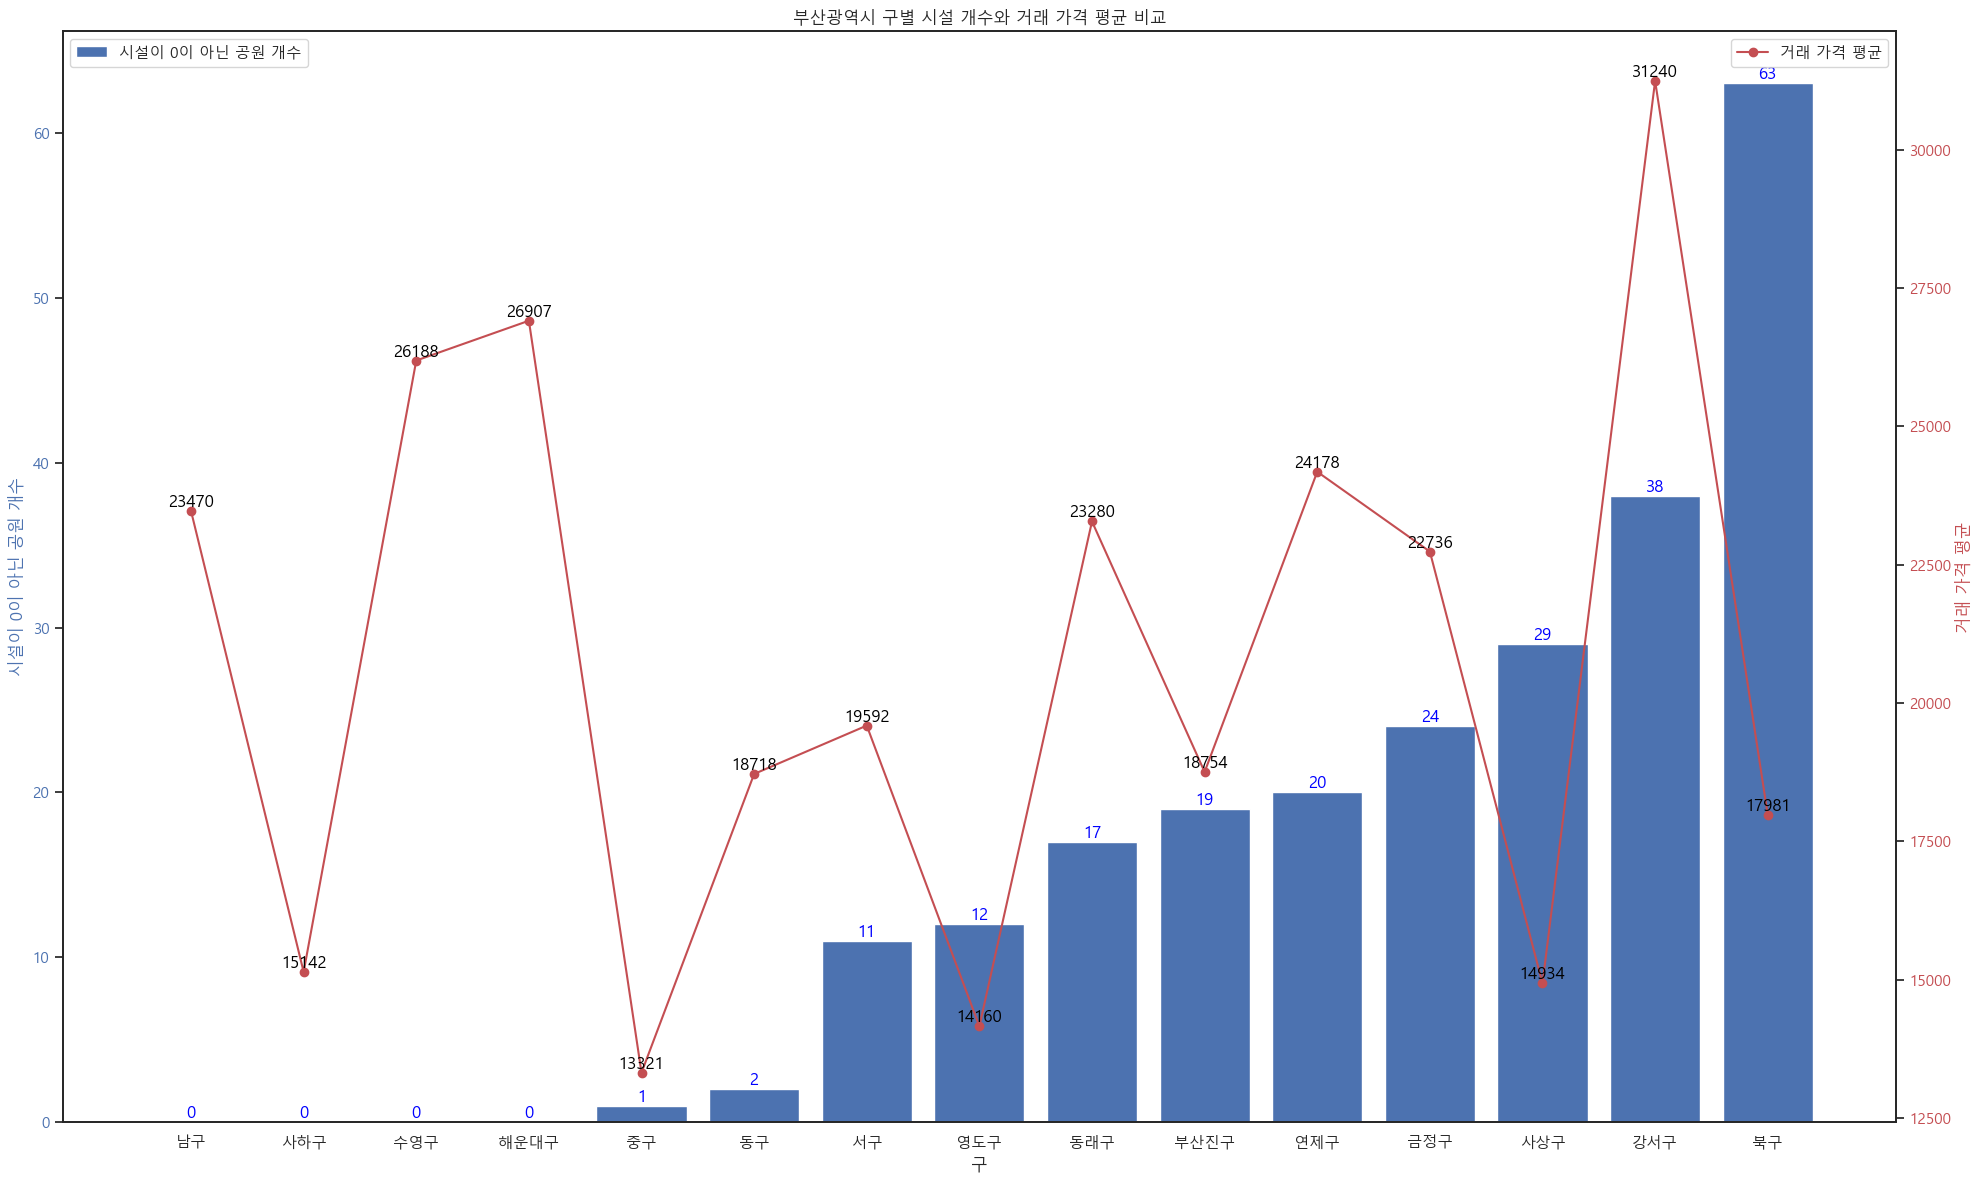

In [105]:
# 1. 시각화 - 부산광역시 'gu 이름', 'busan_non_zero_counts', 'transaction_real_price' 표시
# 세로막대그래프 값이 작은 순서대로 정렬
busan_non_zero_counts_sorted = busan_non_zero_counts.sort_values()

# 거래 가격 평균도 같은 순서로 정렬
busan_transaction_price_sorted = busan_merged.loc[busan_non_zero_counts_sorted.index, 'transaction_real_price']

# 시각화 시작
fig, ax1 = plt.subplots(figsize=(20, 12))

# X축: 구 이름 (정렬된 상태)
gu_names_sorted = busan_non_zero_counts_sorted.index

# 첫 번째 Y축: 시설이 0이 아닌 공원 개수 (막대 그래프)
bars = ax1.bar(gu_names_sorted, busan_non_zero_counts_sorted, color='b', label='시설이 0이 아닌 공원 개수')
ax1.set_xlabel('구')
ax1.set_ylabel('시설이 0이 아닌 공원 개수', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 막대 위에 수치 표시
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', color='blue')

# 두 번째 Y축: 거래 가격 평균 (선 그래프)
ax2 = ax1.twinx()
ax2.plot(gu_names_sorted, busan_transaction_price_sorted, color='r', marker='o', label='거래 가격 평균')
ax2.set_ylabel('거래 가격 평균', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 선 위에 수치 표시
for i, price in enumerate(busan_transaction_price_sorted):
    ax2.text(i, price, f'{int(price)}', ha='center', va='bottom', color='black')

# 그래프 제목
plt.title('부산광역시 구별 시설 개수와 거래 가격 평균 비교')

# 레전드 설정
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 표시
plt.xticks(rotation=90)  # 구 이름이 잘 보이도록 X축 라벨 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()